<a href="https://colab.research.google.com/github/TuragaMurali29/Introduction-To-Machine-Learning/blob/main/Introduction_To_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random

In [2]:
# Introduction to ML
# Used Libraries - random,numpy,pandas

In [3]:
# Terms in Machine learning.

# 1. Collection : Data used for training,validating and testing the machine learning model.

# 2. Feature : Independent variable or input variable - used to predict the target variable.

# 3. Target (Y) : Dependent variable - output - we want to predict - Example : Predicting Number  bedrooms.

# 4. Training Data : Subset of dataset used to train the model.

# 5. Testing Data : Subset of dataset used to validate the trained model.

# 6. Model : Mathematical representation of relationship between feature and target.

# 7. Supervised Learning (SL) : Training the model based on labled data \ model learns from known /labled data.

# 8.Regression : Method to predict continues values from a model - Supervised learning.

# 9. Overfitting : When a model learns from training data too well, includes noise - perform poorely new data .

# 10. Underfitting : Model is too simpler and does not capture patterns in data.
# # Categories in Machine learning :
# 1. Supervised Learning :
# Model learns from labeled data - i/o pairs
# Example : Linear reegression, Decision trees, Random forest, SVM
# Best use case so far : House price prediction based on previous/historical data

# 2. Unsurprised learning :
# Model finds new patterns in unlabeled data without predefined data/labels.
# Example : Clustering (K means),PCA
# Use case : Customer segmentation in marketing
# 3. Reinforcement learning :
# Model learns by interacting with environment and receiving the regards or penalities
# Example : Deep learning , AlphaGo,..
# Best use case : Self car driving vehicles , Self learning AI bots,SLAM.

In [ ]:
# Example : Predicting the house price - Random dataset - generated
# Steps :
# 1.Generate a random dataset
# 2.Train a ML model - linear regression
# 3.Evaluate the model
# 4. Make prediction

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
# Step 1 : Generate a random dataset
np.random.seed(42)
 # Used to set same sequence of values for the random package
numSamples = 100

#create numsamples number of samples from (800, 5000)
size = np.random.randint(800, 5000, numSamples)

bedrooms = np.random.randint(1, 6, numSamples)
washrooms = np.random.randint(1, 8, numSamples)
localityScore = np.random.randint(1, 10, numSamples)

# Generate House prices with randomness
housePrice = (size * 3000) + (bedrooms * 50000) + (washrooms * 30000) + (localityScore * 70000) + np.random.randint(-50000, 50000, numSamples)

# Create a dataframe
df = pd.DataFrame({'Size': size,
                   'Bedrooms': bedrooms,
                   'Washrooms': washrooms,
                   'LocalityScore': localityScore,
                   'HousePrice': housePrice
                   })

In [6]:
df

,Size,Bedrooms,Washrooms,LocalityScore,HousePrice
0,1660,5,2,9,5964758
1,4572,4,7,5,14517747
2,3892,5,7,8,12708752
3,1266,5,6,1,4304573
4,4244,3,2,5,13301101
...,...,...,...,...,...
95,1006,1,6,5,3591286
96,2284,3,5,1,7240450
97,1663,4,6,4,5620352
98,3590,1,3,5,11265069


In [7]:
# Step 2 : Train a ML model - linear regression

# Package  (installation) requirements :
# pip install sklearn - learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [8]:
X = df[['Size', 'Bedrooms', 'Washrooms', 'LocalityScore']]
y = df['HousePrice']

In [9]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
# Step 3 :Evaluate the model
# Package requirements :
# sklearn.metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error
y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f"Mean Absolute Error (MAE): {MAE}")
print(f"Mean Squared Error (MSE): {MSE}")
print(f"Root Mean Squared Error (RMSE): {RMSE}")

Mean Absolute Error (MAE): 25385.345481365337
Mean Squared Error (MSE): 796791448.4323988
Root Mean Squared Error (RMSE): 28227.494547557686


In [11]:
# Step 4 : Make a Prediction
newHouse = np.array([[500,1,1,1]])
predictedPrice = model.predict(newHouse)
print(f'The predicted price of new house is {predictedPrice[0]}')


The predicted price of new house is 1669544.1931444053


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
print(f'The predicted price of new house is {predictedPrice[0]}')

The predicted price of new house is 1669544.1931444053


<ipython-input-13-d79f87fa33ba>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


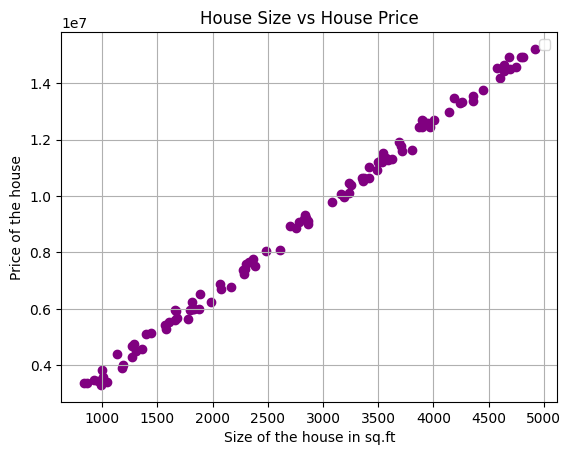

In [13]:
plt.scatter(df['Size'], df['HousePrice'], color = 'purple')
plt.xlabel('Size of the house in sq.ft')
plt.ylabel('Price of the house')
plt.legend()
plt.grid(True)
plt.title('House Size vs House Price')
plt.show()

In [14]:
Xsorted = np.sort(X,axis=0)
ypred = model.predict(Xsorted)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<ipython-input-15-f51a6927a813>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


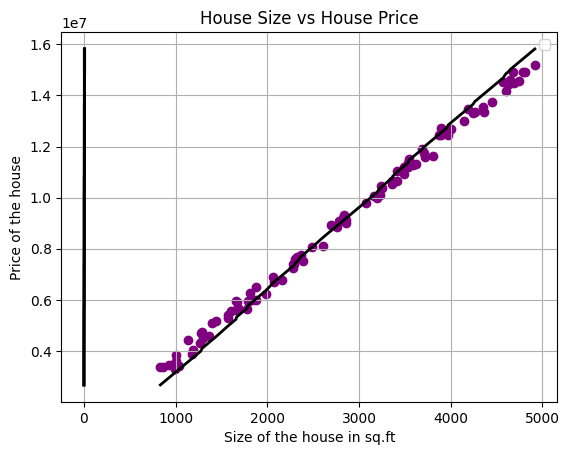

In [15]:
plt.scatter(df['Size'], df['HousePrice'], color = 'purple')
plt.plot(Xsorted, ypred,color = 'black', linewidth = 2)
plt.xlabel('Size of the house in sq.ft')
plt.ylabel('Price of the house')
plt.legend()
plt.grid(True)
plt.title('House Size vs House Price')
plt.show()